In [1]:
import numpy as np
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Import necessary items from Keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, UpSampling2D
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import glob
import cv2
import os

In [3]:
import glob
images = []
labels = []
for path in glob.glob('./binary_lane_bdd/Images/*.jpg'):
    img = cv2.imread(path)
    img = cv2.resize(img, (160,80))
    images.append(img)

for path in glob.glob('./binary_lane_bdd/Labels/*.jpg'):
    img = cv2.imread(path)
    img = cv2.resize(img, (160,80))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    labels.append(gray)

In [4]:
train_images = np.array(images)
labels = np.array(labels)
labels = np.stack((labels,), axis=-1)

In [5]:
print(train_images.shape)
print(labels.shape)

(491, 80, 160, 3)
(491, 80, 160, 1)


In [6]:
np.unique(labels)

array([  0,   1,   2,   3,   4, 125, 126, 127, 128, 129, 130, 251, 252,
       253, 254, 255], dtype=uint8)

In [7]:
# Normalize labels - training images get normalized to start in the network
labels = labels / 255

# Shuffle images along with their labels, then split into training/validation sets
train_images, labels = shuffle(train_images, labels)
# Test size may be 10% or 20%
X_train, X_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.1)

In [8]:
# Batch size, epochs and pool size below are all paramaters to fiddle with for optimization
batch_size = 128
epochs = 100
pool_size = (2, 2)
input_shape = X_train.shape[1:]

In [9]:
input_shape

(80, 160, 3)

In [10]:
### Here is the actual neural network ###
model = Sequential()
# Normalizes incoming inputs. First layer needs the input shape to work
model.add(BatchNormalization(input_shape=input_shape))

# Below layers were re-named for easier reading of model summary; this not necessary
# Conv Layer 1
model.add(Conv2D(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv1'))

# Conv Layer 2
model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2'))

# Pooling 1
model.add(MaxPooling2D(pool_size=pool_size))

# Conv Layer 3
model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv3'))
model.add(Dropout(0.2))

# Conv Layer 4
model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv4'))
model.add(Dropout(0.2))

# Conv Layer 5
model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv5'))
model.add(Dropout(0.2))

# Pooling 2
model.add(MaxPooling2D(pool_size=pool_size))

# Conv Layer 6
model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv6'))
model.add(Dropout(0.2))

# Conv Layer 7
model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv7'))
model.add(Dropout(0.2))

# Pooling 3
model.add(MaxPooling2D(pool_size=pool_size))

# Upsample 1
model.add(UpSampling2D(size=pool_size))

# Deconv 1
model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv1'))
model.add(Dropout(0.2))

# Deconv 2
model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv2'))
model.add(Dropout(0.2))

# Upsample 2
model.add(UpSampling2D(size=pool_size))

# Deconv 3
model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv3'))
model.add(Dropout(0.2))

# Deconv 4
model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv4'))
model.add(Dropout(0.2))

# Deconv 5
model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv5'))
model.add(Dropout(0.2))

# Upsample 3
model.add(UpSampling2D(size=pool_size))

# Deconv 6
model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv6'))

# Final layer - only including one channel so 1 filter
model.add(Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Final'))

### End of network ###

W1222 17:12:50.827518 139709693392704 deprecation_wrapper.py:119] From /home/peerless/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1222 17:12:50.843614 139709693392704 deprecation_wrapper.py:119] From /home/peerless/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1222 17:12:50.857607 139709693392704 deprecation_wrapper.py:119] From /home/peerless/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1222 17:12:50.858436 139709693392704 deprecation_wrapper.py:119] From /home/peerless/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compa

In [11]:
# Using a generator to help the model use less data
datagen = ImageDataGenerator()
datagen.fit(X_train)

In [12]:
# Compiling and training the model
model.compile(optimizer='Adam', loss='mean_squared_error')
model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size), steps_per_epoch=len(X_train)/batch_size,
epochs=epochs, verbose=1, validation_data=(X_val, y_val))

W1222 17:12:51.955529 139709693392704 deprecation_wrapper.py:119] From /home/peerless/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Epoch 1/100
4/3 [==================================] - 4s 888ms/step - loss: 0.0180 - val_loss: 0.0177
Epoch 2/100
4/3 [==================================] - 0s 113ms/step - loss: 0.0177 - val_loss: 0.0175
Epoch 3/100
4/3 [==================================] - 0s 112ms/step - loss: 0.0180 - val_loss: 0.0175
Epoch 4/100
4/3 [==================================] - 0s 100ms/step - loss: 0.0177 - val_loss: 0.0175
Epoch 5/100
4/3 [==================================] - 0s 103ms/step - loss: 0.0179 - val_loss: 0.0174
Epoch 6/100
4/3 [==================================] - 0s 103ms/step - loss: 0.0171 - val_loss: 0.0174
Epoch 7/100
4/3 [==================================] - 0s 101ms/step - loss: 0.0174 - val_loss: 0.0173
Epoch 8/100
4/3 [==================================] - 0s 100ms/step - loss: 0.0174 - val_loss: 0.0171
Epoch 9/100
4/3 [==================================] - 0s 98ms/step - loss: 0.0170 - val_loss: 0.0172
Epoch 10/100
4/3 [==================================] - 0s 103ms/step - lo

Epoch 80/100
4/3 [==================================] - 0s 102ms/step - loss: 0.0152 - val_loss: 0.0155
Epoch 81/100
4/3 [==================================] - 0s 105ms/step - loss: 0.0151 - val_loss: 0.0155
Epoch 82/100
4/3 [==================================] - 0s 102ms/step - loss: 0.0151 - val_loss: 0.0155
Epoch 83/100
4/3 [==================================] - 0s 104ms/step - loss: 0.0150 - val_loss: 0.0153
Epoch 84/100
4/3 [==================================] - 0s 103ms/step - loss: 0.0151 - val_loss: 0.0153
Epoch 85/100
4/3 [==================================] - 0s 105ms/step - loss: 0.0148 - val_loss: 0.0155
Epoch 86/100
4/3 [==================================] - 0s 104ms/step - loss: 0.0148 - val_loss: 0.0154
Epoch 87/100
4/3 [==================================] - 0s 102ms/step - loss: 0.0149 - val_loss: 0.0153
Epoch 88/100
4/3 [==================================] - 0s 104ms/step - loss: 0.0149 - val_loss: 0.0155
Epoch 89/100
4/3 [==================================] - 0s 105ms

In [13]:
# Freeze layers since training is done
model.trainable = False
model.compile(optimizer='Adam', loss='mean_squared_error')

# Save model architecture and weights
model.save('100e_128.h5')

# Show summary of model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 80, 160, 3)        12        
_________________________________________________________________
Conv1 (Conv2D)               (None, 78, 158, 8)        224       
_________________________________________________________________
Conv2 (Conv2D)               (None, 76, 156, 16)       1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 78, 16)        0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 36, 76, 16)        2320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 76, 16)        0         
_________________________________________________________________
Conv4 (Conv2D)               (None, 34, 74, 32)        4640      
__________

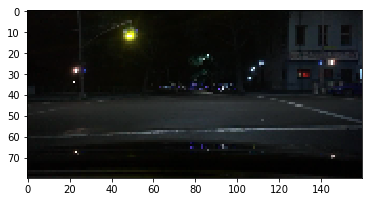

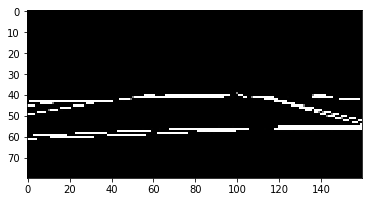

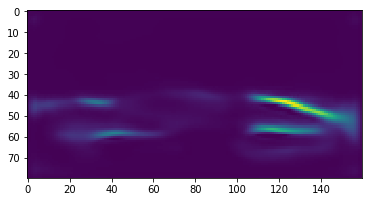

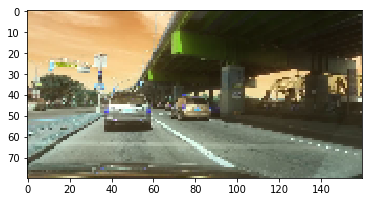

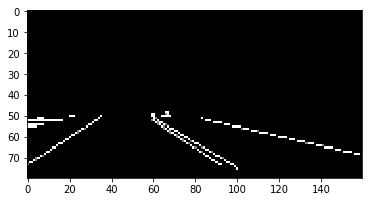

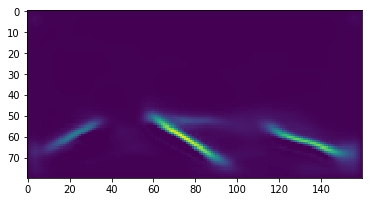

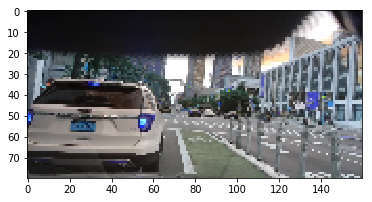

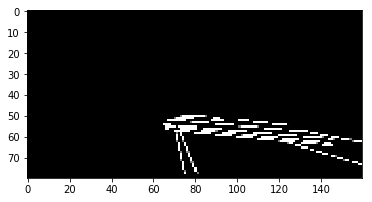

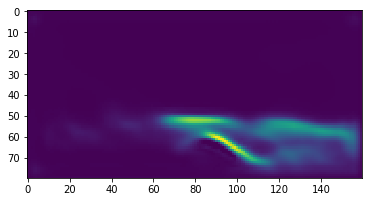

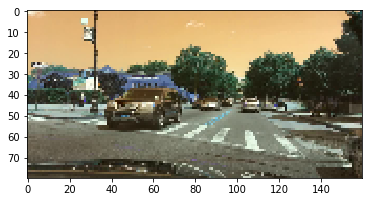

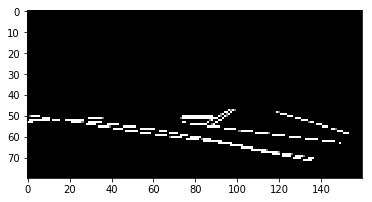

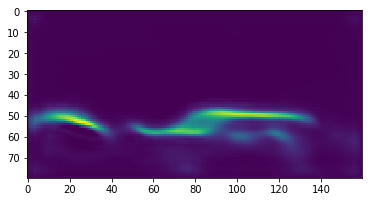

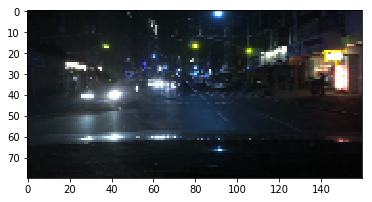

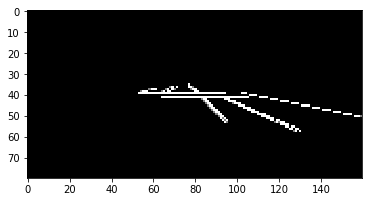

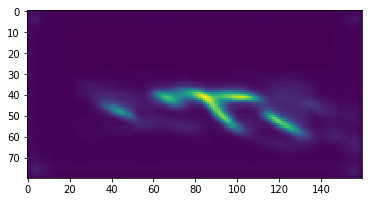

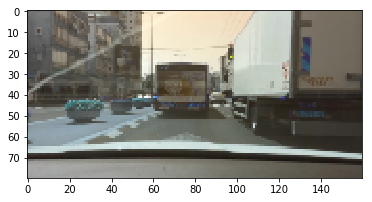

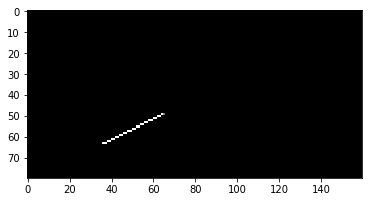

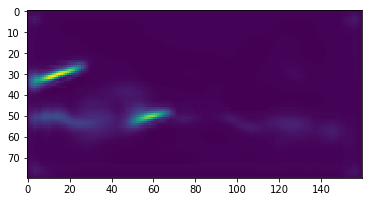

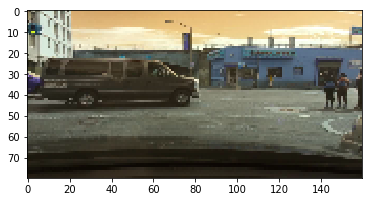

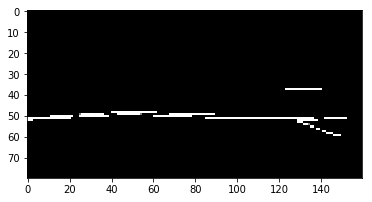

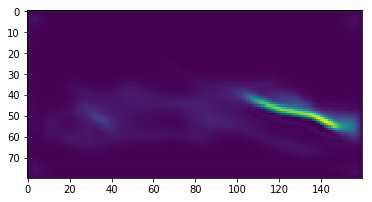

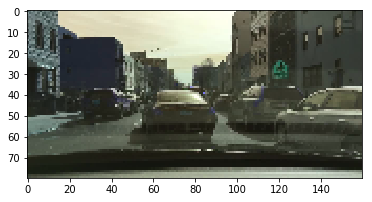

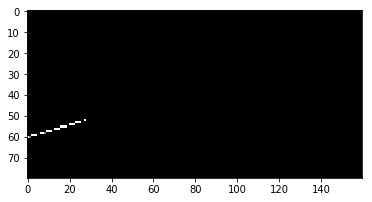

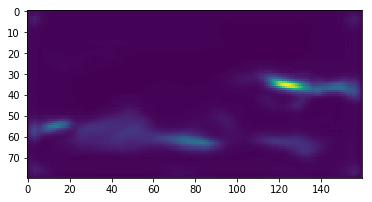

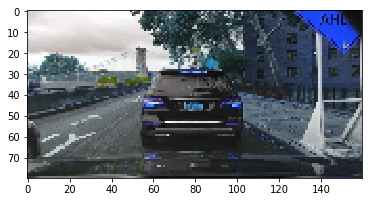

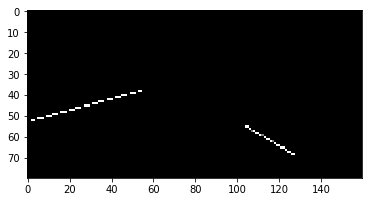

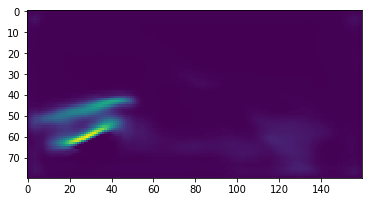

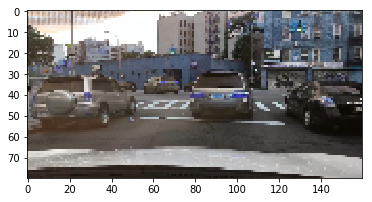

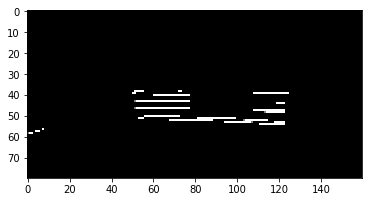

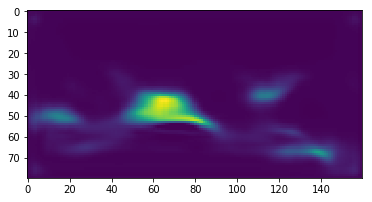

In [14]:
test_images = []
for path in glob.glob('./binary_lane_bdd/test/images/*.jpg'):
    img = cv2.resize(cv2.imread(path), (160,80))
    label = cv2.resize(cv2.imread(os.path.join('./binary_lane_bdd/test/labels',os.path.basename(path))), (160,80))
    out = model.predict(np.array([img]))
    plt.imshow(img)
    plt.show()
    plt.imshow(label)
    plt.show()
    plt.imshow(out[0,:,:,0])
    plt.show()
